# MNIST Digit Classification with TensorFlow and Keras using tf.GradientTape

This Jupyter notebook demonstrates the process of training a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset using TensorFlow and Keras. The notebook is structured as follows:

1. **Importing Libraries**: The necessary libraries are imported, including TensorFlow, Matplotlib, NumPy, and Keras.

2. **Data Preprocessing**: The MNIST dataset is loaded and preprocessed. The images are reshaped, normalized, and the labels are converted to categorical format.

3. **Model Definition**: A CNN model is defined using the Sequential API of Keras. The model consists of two convolutional layers, each followed by a max pooling layer, a flatten layer, a dense layer, a dropout layer, and an output dense layer.

4. **Model Compilation**: The model is compiled with the Adam optimizer and categorical cross-entropy loss function.

5. **Training the Model**: The model is trained for a specified number of epochs. For each epoch, the model is trained on batches of the training data, and the loss and accuracy are calculated for each batch and epoch.

6. **Evaluation**: The trained model is evaluated on the test data, and the accuracy is printed.

7. **Visualization**: The training loss is plotted against the epochs.

The following sections provide more detailed explanations of each part of the code.

## 1. Importing Libraries

```python
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from tqdm import trange
import time

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
```

The necessary libraries are imported, and the TensorFlow logging level is set to suppress warnings and information messages.

## 2. Data Preprocessing

```python
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalization
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train_std[x_train_std == 0] = 1  # Prevent division by zero
x_train = (x_train - x_train_mean) / x_train_std

x_test_mean = np.mean(x_test, axis=0)
x_test_std = np.std(x_test, axis=0)
x_test_std[x_test_std == 0] = 1  # Prevent division by zero
x_test = (x_test - x_test_mean) / x_test_std
```

The MNIST dataset is loaded, and the images are reshaped to have a single channel (grayscale) and are converted to float32 data type. The labels are then converted to categorical format. The images are normalized by subtracting the mean and dividing by the standard deviation.

## 3. Model Definition

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
```

A CNN model is defined using the Sequential API of Keras. The model consists of two convolutional layers, each followed by a max pooling layer, a flatten layer, a dense layer, a dropout layer, and an output dense layer.

## 4. Model Compilation

```python
optimizer = Adam(learning_rate=0.01, decay=0.01 / 2)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
```

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.

## 5. Training the Model

```python
epochs = 2
batch_size = 128
bat_per_epoch = int(np.ceil(len(x_train) / batch_size))

losses = []
accuracies = []

for epoch in trange(epochs):
    epoch_start_time = time.time()
    epoch_losses = []
    for i in range(bat_per_epoch):
        start = i * batch_size
        end = start + batch_size
        loss = step_one_epoch(x_train[start:end], y_train[start:end])
        epoch_losses.append(loss)

    y_pred = model.predict(x_test)
    correct_predictions = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))
    accuracy = np.mean(correct_predictions)
    accuracies.append(accuracy)

    end_time = time.time()
    d_time = (end_time - epoch_start_time) / 60.0

    out_loss = np.mean(epoch_losses)
    losses.append(out_loss)
    print(f"epoch: {epoch+1}, took: {d_time:.2f} minutes, loss: {out_loss:.2f}")
```

The model is trained for a specified number of epochs. For each epoch, the model is trained on batches of the training data, and the loss and accuracy are calculated for each batch and epoch.

## 6. Evaluation

```python
print("accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])
```

The trained model is evaluated on the test data, and the accuracy is printed.

## 7. Visualization

```python
plt.plot(range(epochs), losses, label="train loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
```

The training loss is plotted against the epochs.

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


  0%|          | 0/15 [00:00<?, ?it/s]

313/313 [==============================] - 1s 4ms/step


  7%|▋         | 1/15 [00:16<03:44, 16.04s/it]

epoch: 1, took: 0.27 minutes, loss: 0.27
313/313 [==============================] - 1s 2ms/step


 13%|█▎        | 2/15 [00:25<02:41, 12.41s/it]

epoch: 2, took: 0.16 minutes, loss: 0.08
313/313 [==============================] - 1s 3ms/step


 20%|██        | 3/15 [00:36<02:17, 11.48s/it]

epoch: 3, took: 0.17 minutes, loss: 0.06
313/313 [==============================] - 1s 4ms/step


 27%|██▋       | 4/15 [00:47<02:05, 11.38s/it]

epoch: 4, took: 0.19 minutes, loss: 0.05
313/313 [==============================] - 1s 3ms/step


 33%|███▎      | 5/15 [00:58<01:52, 11.27s/it]

epoch: 5, took: 0.18 minutes, loss: 0.04
313/313 [==============================] - 1s 3ms/step


 40%|████      | 6/15 [01:10<01:42, 11.36s/it]

epoch: 6, took: 0.19 minutes, loss: 0.04
313/313 [==============================] - 1s 4ms/step


 47%|████▋     | 7/15 [01:20<01:29, 11.18s/it]

epoch: 7, took: 0.18 minutes, loss: 0.04
313/313 [==============================] - 1s 4ms/step


 53%|█████▎    | 8/15 [01:32<01:18, 11.19s/it]

epoch: 8, took: 0.19 minutes, loss: 0.03
313/313 [==============================] - 1s 4ms/step
epoch: 9, took: 0.18 minutes, loss: 0.03


 60%|██████    | 9/15 [01:42<01:06, 11.02s/it]

313/313 [==============================] - 1s 3ms/step


 67%|██████▋   | 10/15 [01:53<00:54, 10.91s/it]

epoch: 10, took: 0.18 minutes, loss: 0.03
313/313 [==============================] - 1s 4ms/step


 73%|███████▎  | 11/15 [02:04<00:43, 10.90s/it]

epoch: 11, took: 0.18 minutes, loss: 0.03
313/313 [==============================] - 1s 4ms/step


 80%|████████  | 12/15 [02:16<00:34, 11.35s/it]

epoch: 12, took: 0.21 minutes, loss: 0.03
313/313 [==============================] - 1s 4ms/step


 87%|████████▋ | 13/15 [02:29<00:23, 11.70s/it]

epoch: 13, took: 0.21 minutes, loss: 0.02
313/313 [==============================] - 1s 4ms/step


 93%|█████████▎| 14/15 [02:41<00:11, 11.93s/it]

epoch: 14, took: 0.21 minutes, loss: 0.02
313/313 [==============================] - 1s 4ms/step


100%|██████████| 15/15 [02:54<00:00, 11.61s/it]

epoch: 15, took: 0.21 minutes, loss: 0.02


accuracy: 0.9886000156402588


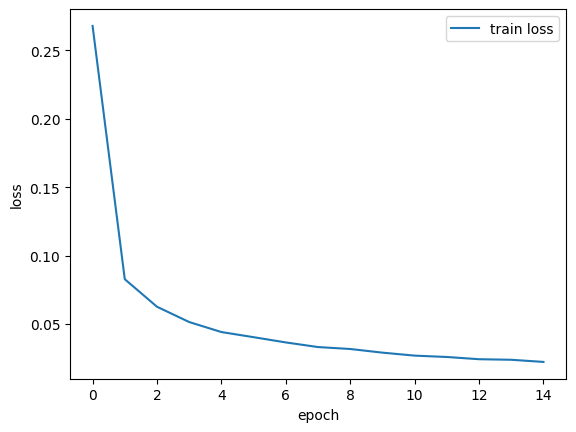

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from tqdm import trange
import time

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def step_one_epoch(x_batch, y_batch):
    with tf.GradientTape() as tape:
        y_prime = model(x_batch, training=True)
        model_loss = categorical_crossentropy(y_batch, y_prime)
        model_loss = tf.reduce_mean(model_loss)

    model_gradient = tape.gradient(model_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(model_gradient, model.trainable_variables))

    return model_loss.numpy()

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalization
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train_std[x_train_std == 0] = 1  # Prevent division by zero
x_train = (x_train - x_train_mean) / x_train_std

x_test_mean = np.mean(x_test, axis=0)
x_test_std = np.std(x_test, axis=0)
x_test_std[x_test_std == 0] = 1  # Prevent division by zero
x_test = (x_test - x_test_mean) / x_test_std

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.01, decay=0.01 / 2)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 15
batch_size = 128
bat_per_epoch = int(np.ceil(len(x_train) / batch_size))

losses = []
accuracies = []

for epoch in trange(epochs):
    epoch_start_time = time.time()
    epoch_losses = []
    for i in range(bat_per_epoch):
        start = i * batch_size
        end = start + batch_size
        loss = step_one_epoch(x_train[start:end], y_train[start:end])
        epoch_losses.append(loss)

    y_pred = model.predict(x_test)
    correct_predictions = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))
    accuracy = np.mean(correct_predictions)
    accuracies.append(accuracy)

    end_time = time.time()
    d_time = (end_time - epoch_start_time) / 60.0

    out_loss = np.mean(epoch_losses)
    losses.append(out_loss)
    print(f"epoch: {epoch+1}, took: {d_time:.2f} minutes, loss: {out_loss:.2f}")

print("accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])

plt.plot(range(epochs), losses, label="train loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
